# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here:

We will generate an algorithm that predicts the salaries associated with new job postings. We will do this by analyzing a set of job postings with known salaries. Our metric that we will be using is the RMSE (root mean squared error), which will give an intuitive sense of how far off our predictions will be from actual salaries. 

In [61]:
#import your libraries
import pandas as pd
import sklearn as sk
#etc

import matplotlib.pyplot as plt
import os

#your info here
__author__ = "Chris Miles"
__email__ = "chrisrichardmiles@gmail.com"

In [36]:
# I want to be able to see all the data without (...) covering up columns or rows
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe
train_features_raw = pd.read_csv('data/train_features.csv')
train_salaries_raw = pd.read_csv('data/train_salaries.csv')
test_features_raw = pd.read_csv('data/test_features.csv')

### ---- 3 Clean the data ----

In [2]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [8]:
# take a look at the head of each of the dataframes to get familiar
train_features_raw.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
train_salaries_raw.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
test_features_raw.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [18]:
# I am going to merge the training data so that I can easily to do some pretraining analysis
train_raw = pd.merge(train_features_raw, train_salaries_raw)

In [22]:
# check that all the rows from the train_features and train_salaries are included
train_raw.shape[0] == train_features_raw.shape[0] == train_salaries_raw.shape[0]

True

In [25]:
# drop the jobId column as is sure to have no predictive value
train_raw.drop('jobId', axis = 1, inplace = True)

In [26]:
train_raw.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [37]:
# check out the duplicated rows to see if we want to remove them
display_all(train_raw.loc[train_raw.duplicated(keep = False) == True].sort_values('companyId'))

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
913437,COMP0,CTO,HIGH_SCHOOL,NONE,HEALTH,19,28,142
854578,COMP0,JANITOR,NONE,NONE,FINANCE,5,18,73
774493,COMP0,CTO,HIGH_SCHOOL,NONE,HEALTH,19,28,142
369349,COMP0,JANITOR,NONE,NONE,FINANCE,5,18,73
427008,COMP0,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,9,79,32
392396,COMP0,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,9,79,32
230054,COMP1,JANITOR,NONE,NONE,AUTO,1,95,30
744417,COMP1,CFO,HIGH_SCHOOL,NONE,SERVICE,8,79,111
170226,COMP1,JANITOR,HIGH_SCHOOL,NONE,FINANCE,19,19,137
535587,COMP1,JUNIOR,HIGH_SCHOOL,NONE,FINANCE,12,70,102


In [39]:
# I will drop duplicates since I believe they are actually copies of the same job posting. I will keep the first occurance
train_raw.drop_duplicates(inplace = True)
train_raw.shape

(999814, 8)

In [41]:
# lets get a feel for the data
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999814 entries, 0 to 999999
Data columns (total 8 columns):
companyId              999814 non-null object
jobType                999814 non-null object
degree                 999814 non-null object
major                  999814 non-null object
industry               999814 non-null object
yearsExperience        999814 non-null int64
milesFromMetropolis    999814 non-null int64
salary                 999814 non-null int64
dtypes: int64(3), object(5)
memory usage: 68.7+ MB


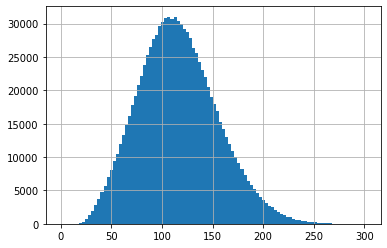

In [49]:
# lets check the salary histogram and see if we find anything unusual
train_raw.salary.hist(bins = 100)

In [52]:
# Lets take a look at the lower end and make sure we don't have anything unrealistically low
display_all(train_raw.loc[train_raw.salary < 15])

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [56]:
# since there are only rows with salaries less than 15K, and they are all 0, I am choosing to remove these from our training set
train_raw.drop(train_raw.loc[train_raw.salary == 0].index, inplace = True)

In [67]:
# in order to save this dataframe in feather format, I must first reset its index.
train_raw.reset_index(inplace = True, drop = True)

train_raw.head()

KeyError: "['index'] not found in axis"

In [72]:
# done with cleaning, I will save my dataframe in a feather format to come back to where I am at any time 
os.makedirs('tmp', exist_ok = True)
train_raw.to_feather('tmp/salaries-raw')

Now we can start here if we want to return to our work and start with a clean dataframe in the future

In [73]:
train_raw = pd.read_feather('tmp/salaries-raw')

### ---- 4 Explore the data (EDA) ----

In [74]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features
df = train_raw.copy()

In [75]:
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


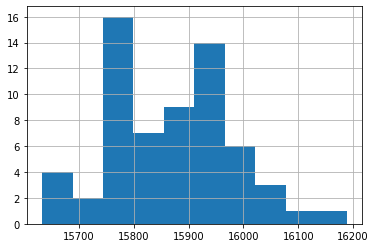

In [77]:
df.companyId.value_counts()

In [80]:
df.groupby('companyId')['salary'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
companyId,,,,,,,,
COMP37,15901.0,115.340545,38.677466,20.0,88.0,113.0,141.0,285.0
COMP53,15773.0,115.351423,38.673132,22.0,87.0,113.0,140.0,278.0
COMP57,15633.0,115.400499,38.514630,19.0,88.0,113.0,140.0,263.0
COMP42,15939.0,115.490620,38.805584,19.0,88.0,113.0,141.0,281.0
COMP54,15975.0,115.595681,38.369313,22.0,88.0,113.0,140.0,274.0
...,...,...,...,...,...,...,...,...
COMP21,15944.0,116.550552,38.772297,20.0,89.0,114.0,142.0,287.0
COMP13,15951.0,116.567613,38.879830,21.0,89.0,114.0,142.0,273.0
COMP44,15997.0,116.697943,38.801346,20.0,89.0,115.0,142.0,294.0


In [81]:
df.companyId.describe()

count     999809
unique        63
top       COMP39
freq       16188
Name: companyId, dtype: object

In [87]:
for col in df.columns: 
    print(col, '\n', df[col].describe(), '\n\n')

companyId 
 count     999809
unique        63
top       COMP39
freq       16188
Name: companyId, dtype: object 


jobType 
 count     999809
unique         8
top       SENIOR
freq      125870
Name: jobType, dtype: object 


degree 
 count          999809
unique              5
top       HIGH_SCHOOL
freq           236879
Name: degree, dtype: object 


major 
 count     999809
unique         9
top         NONE
freq      532176
Name: major, dtype: object 


industry 
 count     999809
unique         7
top          WEB
freq      143179
Name: industry, dtype: object 


yearsExperience 
 count    999809.000000
mean         11.992603
std           7.212358
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          24.000000
Name: yearsExperience, dtype: float64 


milesFromMetropolis 
 count    999809.000000
mean         49.528246
std          28.877571
min           0.000000
25%          25.000000
50%          50.000000
75%          75.000000
max 

In [88]:
df.plot.scatter('jobType', 'salary')

ValueError: scatter requires x column to be numeric

establish numerical and categorical data 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999809 entries, 0 to 999808
Data columns (total 8 columns):
companyId              999809 non-null object
jobType                999809 non-null object
degree                 999809 non-null object
major                  999809 non-null object
industry               999809 non-null object
yearsExperience        999809 non-null int64
milesFromMetropolis    999809 non-null int64
salary                 999809 non-null int64
dtypes: int64(3), object(5)
memory usage: 61.0+ MB


In [90]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']

Summarize numerical and categorical data separately

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data